# Setup

In [1]:
import sys
sys.path.append('/mnt/c/Users/Arnisa/Desktop/MP/mp-tl-study')
from functions.visualization_utils import *

## Load Data

In [5]:
# OR LOAD ARI Scores
with open("results/regular_classes_cluster.json", "r") as f:
    scores_all = json.load(f)
df = pd.DataFrame(scores_all)

df.head()

,Percentage,Repeat,Layer,Precision,Recall,Accuracy,ARI,Dataset,Split
0,0.001,0,conv0,0.461538,0.810811,0.533333,0.234375,Finetune,Train
1,0.001,0,conv1,0.568966,0.891892,0.600000,0.440771,Finetune,Train
2,0.001,0,conv2,0.540000,0.729730,0.600000,0.318584,Finetune,Train
3,0.001,0,conv3,0.352941,0.810811,0.400000,0.022523,Finetune,Train
4,0.001,0,conv4,0.568966,0.891892,0.600000,0.440771,Finetune,Train


## Plot

In [3]:
map_to_cuts = {
    "conv0":1,
    "conv1":2,
    "conv2":3,
    "conv3":4,
    "conv4":5,
    "conv5":6,
}

tick_labels_dict = {
    1: "Conv0",
    2: "Conv1",
    3: "Conv2",
    4: "Conv3",
    5: "Conv4",
    6: "Conv5",
}

<module 'matplotlib.pyplot' from '/home/arnisa/anaconda3/envs/mp-env/lib/python3.7/site-packages/matplotlib/pyplot.py'>

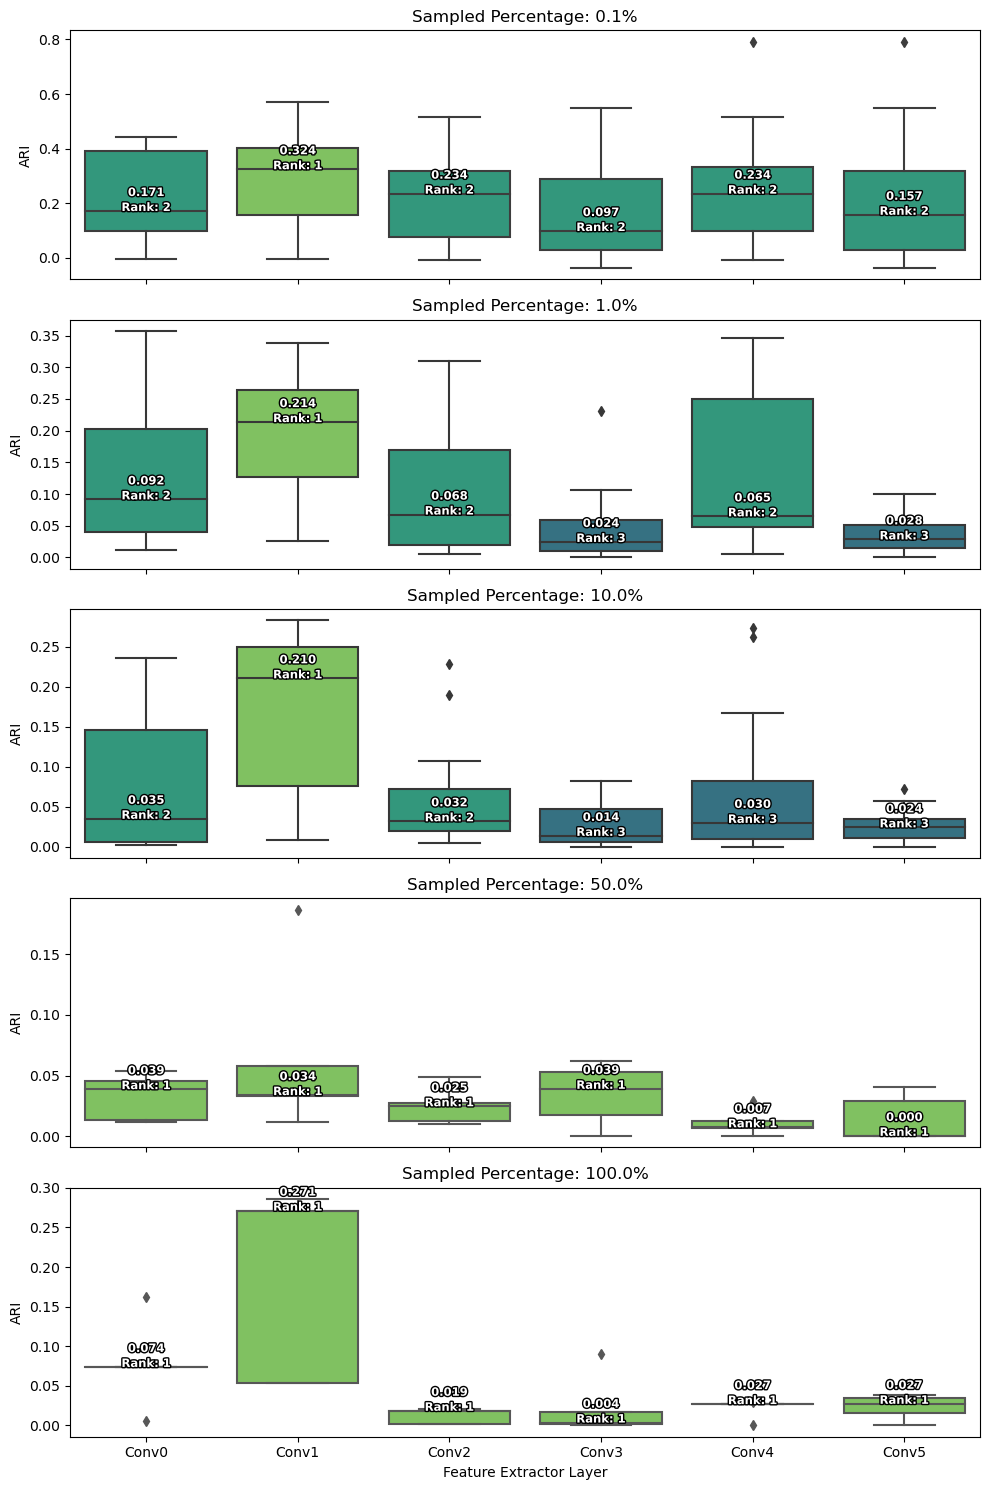

In [9]:
df = df[df["Layer"].isin(map_to_cuts.keys())]
df["Cut Point"] = df["Layer"].map(map_to_cuts)
df['Test Accuracy'] = df['ARI']
# run statistical tests below to get the df_rankings
_, df_rankings = get_rankings(df=df)
cluster_box_plot(df=df, rank_df=df_rankings, add_baseline=False, tick_labels_dict=tick_labels_dict)

# 2. Statistical Tests

### Tables for Ranking Cuts
Also can be used with df_other

In [10]:
df_wilcoxon_pairwise, _ = get_rankings(df=df)

df_wilcoxon_pairwise["statistic"] = df_wilcoxon_pairwise["statistic"].astype(int)

latex_table = df_wilcoxon_pairwise.to_latex(index=False, float_format="%.6f")

rows = latex_table.split("\n")[4:-3]
header = latex_table.split("\n")[:4]
footer = latex_table.split("\n")[-3:]

# iterate over the rows and the df_wilcoxon_pairwise
for i, row in enumerate(rows):
    # print(row)
    row = row.split(" & ")   
    # print(float(row[0].lstrip())*100)
    row = " & ".join([str(float(row[0].lstrip())*100)[:5]] + row[1:-1])
    if df_wilcoxon_pairwise.iloc[i]["is_significant"]:
        row = "\\rowcolor{green!20}\n" + row
    
    rows[i] = row + " \\\\"

# join the header, rows and footer, putting a "\\" at the end of each row
latex_table = "\n".join(rows)

/home/arnisa/anaconda3/envs/mp-env/lib/python3.7/site-packages/scipy/stats/morestats.py:3141: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


In [11]:
print(latex_table)

\rowcolor{green!20}
0.1 &            1 &            2 &         32 & 0.035157 \\
0.1 &            1 &            3 &        132 & 0.867133 \\
0.1 &            1 &            4 &        108 & 0.235687 \\
0.1 &            1 &            5 &        136 & 0.689126 \\
0.1 &            1 &            6 &        117 & 0.345729 \\
\rowcolor{green!20}
0.1 &            2 &            3 &         34 & 0.024907 \\
\rowcolor{green!20}
0.1 &            2 &            4 &         65 & 0.026399 \\
0.1 &            2 &            5 &         87 & 0.501591 \\
0.1 &            2 &            6 &         88 & 0.076489 \\
0.1 &            3 &            4 &         38 & 0.211476 \\
0.1 &            3 &            5 &         59 & 0.407434 \\
0.1 &            3 &            6 &        117 & 0.757760 \\
0.1 &            4 &            5 &         32 & 0.062671 \\
0.1 &            4 &            6 &         88 & 0.525653 \\
0.1 &            5 &            6 &         54 & 0.469113 \\
\rowcolor{green!20}
1.0 &